In [204]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
A = np.array([[0, 0, 0, 0], [1/2, 0, 0, 0], [0, 1/2, 0, 0], [0, 0, 1, 0]])
a = np.array([[0], [1/2], [1/2], [1]])
b = np.array([1/6, 1/3, 1/3, 1/6])
s = 4

In [206]:
def f1(u, t):
    return u + t**2 + 1
u1_0 = 0.5

In [207]:
def rungeKutt(f, u0, t, s=s, A=A, a=a, b=b):
    u = np.array([u0] * len(t))
    tau = t[1:] - t[:-1]
    for n, _ in enumerate(u[:-1]):
        w = np.array([0.] * s)
        for k, _ in enumerate(w):
            w[k] = f(u[n] + tau[n]*(w @ A[k].T), t[n] + tau[n]*a[k][0])
        u[n+1] = u[n] + tau[n] * (w @ b.T)
    return u, t


def effective_p(U2, U1, U0, r):
    return np.log( (U2-U1) / (U1-U0) ) / np.log(r)

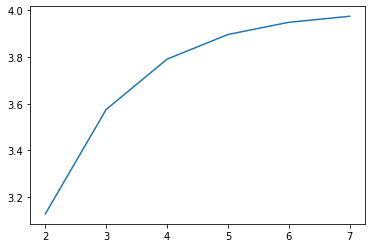

In [208]:
answers = [ rungeKutt(f1, u1_0, np.linspace(0, 1, 2**i + 1)) for i in range(8) ]
p = [effective_p(answers[i][0][-1], answers[i-1][0][-1], answers[i-2][0][-1], 1/2) for i in range(2, len(answers))]
plt.plot(range(2,len(answers)), p)

In [209]:
def f2(u, t):
    om = np.array([np.sin(t), np.cos(t), np.sin(t + np.pi/4)])
    Omega = np.array([[0., -om[2], om[1]], [om[2], 0., -om[0]], [-om[1], om[0], 0]])
    return Omega @ u
u2_0 = np.array([1, -0.5, 0.6])

In [210]:
answers1 = [ rungeKutt(f2, u2_0, np.linspace(0, 1, 2**i + 1)) for i in range(8) ]
plt.figure()
plt.plot(answers1[-1][1], [t[0][0] for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t[1][0] for t in answers1[-1][0]])
plt.plot(answers1[-1][1], [t[2][0] for t in answers1[-1][0]])

ValueError: setting an array element with a sequence.